In [1]:
import pandas as pd

In [2]:
#import population aged 15+, by gender, age and socio economic status
#here we consider that we are in the folder that contains demographics and deaths by city
pop15plus=pd.read_csv('../pop_age15plus_sex_socio_2018.zip', sep=';', dtype={'CODGEO':str,'CS1_8':str})
#pop15plus[['CS1_8']]='7' #to remove social status from SMRs !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
pop15plus #About 35,000 parts of France ! (cities and arrondissements)

,NIVGEO,CODGEO,LIBGEO,CS1_8,AGEQ65,SEXE,NB
0,ARM,13201,Marseille 1er Arrondissement,1,15,1,0.000000
1,ARM,13201,Marseille 1er Arrondissement,1,15,2,0.000000
2,ARM,13201,Marseille 1er Arrondissement,1,20,1,0.000000
3,ARM,13201,Marseille 1er Arrondissement,1,20,2,0.000000
4,ARM,13201,Marseille 1er Arrondissement,1,25,1,0.000000
...,...,...,...,...,...,...,...
6158763,COM,97424,Cilaos,8,55,2,45.551263
6158764,COM,97424,Cilaos,8,60,1,30.882284
6158765,COM,97424,Cilaos,8,60,2,61.032835
6158766,COM,97424,Cilaos,8,65,1,10.343150


In [3]:
pop15plus.dtypes

NIVGEO     object
CODGEO     object
LIBGEO     object
CS1_8      object
AGEQ65      int64
SEXE        int64
NB        float64
dtype: object

In [4]:
# this previous file comes from https://www.insee.fr/fr/statistiques/5395878?sommaire=5395927 ("POP6"). In the 3rd tab, https://www.insee.fr/fr/statistiques/5395878?sommaire=5395927#dictionnaire one can see that
# a) "AGEQ65" goes from 15 which means 15-19 to 60 which means 60-64 and  then 65 which means 65+. We are not interested in the latter because it is impossible to associate a clear mortality risk to it: it contains people aged 65 and 100 with very different risks
# b) SEXE = 1 for males and 2 for females
# c) "CS1_8" means:
# 1 : agriculteurs exploitants
# 2 : artisans, commerçants, chefs entreprise
# 3 : cadres et professions intellectuelles supérieures
# 4 : professions intermédiaires
# 5 : employés
# 6 : ouvriers
# 7 : retraités
# 8 : autres personnes sans activité professionnelle
#The mortality tables found here https://www.insee.fr/fr/statistiques/1893092 (morta_cs.xls), that are for both genders, age from 30 to 100, and similar socio professional status, have all the CS1_8 statutes above except "retraités", and has the general population risk in addition. To assign risks to the CS1_8 populations, I decide that retraités will be assigned the general population risk :
#I prepare the name of columns
CSPs = ['Age',
       '7','','', #this should be the general population, but since the mortality table doesn't cover retired persons (I don't know why) they will be assigned to this column
       '1','','', #1 : agriculteurs exploitants - Agriculteurs
       '2','','', #2 : artisans, commerçants, chefs entreprise - Artisans, commerçants, chefs d'entreprise
       '3','','', #3 : cadres et professions intellectuelles supérieures - Cadres et prof. intellectuelles supérieures
       '4','','', #4 : professions intermédiaires - Professions intermédiaires
       '5','','', #5 : employés - Employés
       '6','','', #6 : ouvriers - Ouvriers
       #7,'','', #7 : retraités
       '8','',''] #8 : autres personnes sans activité professionnelle  - Inactifs non retraités
#and get the corresponding mortality tables, for males first
maleMortalityTable = pd.read_excel('../../France,NationalMortalityRates/MORTA_CS.xls',header=7, nrows=71, names = CSPs)[['Age','1','2','3','4','5','6','7','8']]
maleMortalityTable

,Age,1,2,3,4,5,6,7,8
0,30,49.486091,47.627400,29.290863,46.973865,74.284094,96.959508,82.178755,534.657194
1,31,53.056271,51.291788,31.296599,50.587971,77.892440,103.785177,86.716561,556.274159
2,32,56.884021,55.238108,33.439680,54.480141,82.836125,111.091353,91.504939,578.765129
3,33,60.925545,59.427208,35.692967,58.611758,86.771043,116.643579,95.555425,601.549529
4,34,64.400366,62.521132,38.089623,61.663228,90.371488,121.659906,99.313634,625.091951
...,...,...,...,...,...,...,...,...,...
66,96,27964.497878,27028.600151,26191.735080,26680.968914,27157.588333,28308.674116,27318.486890,26191.735080
67,97,29806.488012,28926.468601,28342.463882,28554.427726,29064.513952,30173.334753,29236.710330,28342.463882
68,98,31795.554830,30957.599767,30592.491386,30775.045577,31105.338255,32186.882238,31289.625754,30592.491386
69,99,33940.551045,33131.350963,32950.347169,33040.849066,33289.463211,34358.278238,33486.690833,32950.347169


In [5]:
#female mortality tables, now
femaleMortalityTable = pd.read_excel('../../France,NationalMortalityRates//MORTA_CS.xls',sheet_name=1, header=7, nrows=71,
names=CSPs)[['Age','1','2','3','4','5','6','7','8']]
femaleMortalityTable
#notice that mortality risk is, as excepted, lower for males. As indicated in morta_cs, these are annual death per 100,000 inhabitants

,Age,1,2,3,4,5,6,7,8
0,30,18.386736,17.778614,12.951553,17.434981,25.664147,34.447210,30.471714,140.579007
1,31,20.380733,19.706662,14.468065,19.325762,28.216235,37.643359,32.807321,147.891545
2,32,22.590974,21.843801,16.162147,21.421594,31.022108,41.136061,35.321948,155.584462
3,33,25.578371,24.732394,18.507298,24.254355,34.107001,44.952829,38.996969,163.677543
4,34,28.478077,27.536195,20.766067,27.003963,37.665036,49.341684,42.671989,172.955585
...,...,...,...,...,...,...,...,...,...
66,96,22697.226761,22141.744821,20667.046795,21382.054971,22423.361003,23004.042807,21985.480374,20880.571185
67,97,25164.564539,24548.698060,23384.005177,23946.765640,24860.927772,25504.733507,24488.323191,23665.385409
68,98,27140.624135,26476.396443,25651.948942,26048.732933,26813.144144,27507.505035,26516.823862,25850.340937
69,99,29314.248192,28596.824182,28093.708380,28337.796865,28960.541156,29710.511658,28740.103737,28215.752623


In [6]:
#OK. Now we need, for each line for pop15plus, to assign a mortality risk.
#Or rather, the population starting at age 30, because we did not catch mortality risk at earlier ages
#Later, here I will complement pop15plus with earlier ages that 15, and mortality risks with earlier ages than 30.
#But for now let us neglect deaths before age 30

In [7]:
#For ages below 30 and starting at 65, pop15plus is not adequate.
#=> population by city age gender in 2018: POP1B in https://www.insee.fr/fr/statistiques/5395878?sommaire=5395927#consulter :
POP1B=pd.read_csv('../pop_age_sex_2018.zip', sep=';', dtype={'CODGEO':str})
POP1Byoung = POP1B[POP1B['AGED100']<30]
POP1Baged = POP1B[POP1B['AGED100']>=65]
POP1Byoung[POP1Byoung['CODGEO']=='13201']
#AGED100 does not group ages except "100+" represented as 100.

,NIVGEO,CODGEO,LIBGEO,SEXE,AGED100,NB
0,ARM,13201,Marseille 1er Arrondissement,1,0,297.190407
1,ARM,13201,Marseille 1er Arrondissement,1,1,299.187248
2,ARM,13201,Marseille 1er Arrondissement,1,2,229.153548
3,ARM,13201,Marseille 1er Arrondissement,1,3,249.194916
4,ARM,13201,Marseille 1er Arrondissement,1,4,184.052875
5,ARM,13201,Marseille 1er Arrondissement,1,5,229.219206
6,ARM,13201,Marseille 1er Arrondissement,1,6,171.136935
7,ARM,13201,Marseille 1er Arrondissement,1,7,215.897583
8,ARM,13201,Marseille 1er Arrondissement,1,8,172.978471
9,ARM,13201,Marseille 1er Arrondissement,1,9,151.723407


In [8]:
#let's compare with pop15:
pop15plus[(pop15plus['CODGEO']=='13201') & (pop15plus['AGEQ65']<30)].groupby(['NIVGEO','CODGEO','LIBGEO','SEXE','AGEQ65']).sum()
#ok, 5*300=1500: NB makes sense

NB
NIVGEO CODGEO LIBGEO                       SEXE AGEQ65             
ARM    13201  Marseille 1er Arrondissement 1    15      1077.706051
                                                20      1711.464652
                                                25      1677.950849
                                           2    15      1276.787618
                                                20      1644.370291
                                                25      1596.824139

In [9]:
#OK, for each population, let us assign mortality risk.
#This is done with a left join, once mortality risk was shaped as a single table with columns Age, CS1_8, risk: @Pol Sans I let you do it ?
#I'll start: let us assemble male and female mortality:
maleMortalityTable['SEXE'] = 1
femaleMortalityTable['SEXE'] = 2
mortalityTable = maleMortalityTable.append(femaleMortalityTable)
#for aged persons, we are interested the column '7' for retired persons
POP1Baged = POP1Baged.rename(columns={"AGED100": "Age"})
POP1Baged = POP1Baged.merge(mortalityTable[['Age', 'SEXE','7']], on=['Age', 'SEXE'])
POP1Baged = POP1Baged.rename(columns={'7': 'qx'})
#For ages 30-64 we need to "unpivot"="melt" the mortality table:
#the 1...8 CS1_8 categories are transformed into a 'CS1_8' column:
verticalTable = mortalityTable.melt(id_vars=['Age', 'SEXE'], value_vars=['1','2','3','4','5','6','7','8'], var_name='CS1_8', value_name='qx')
verticalTable

,Age,SEXE,CS1_8,qx
0,30,1,1,49.486091
1,31,1,1,53.056271
2,32,1,1,56.884021
3,33,1,1,60.925545
4,34,1,1,64.400366
...,...,...,...,...
1131,96,2,8,20880.571185
1132,97,2,8,23665.385409
1133,98,2,8,25850.340937
1134,99,2,8,28215.752623


In [10]:
#we also need to group mortality risks by tranches of 5 years (from 30-34, which we name 32, to 60-64, which we name 62):
reducedTable = verticalTable[(verticalTable['Age']>=30) & (verticalTable['Age']<65)].reset_index()
reducedTable['Age'] = (reducedTable['Age']//5)*5+2
reducedTable = reducedTable[['Age','SEXE','CS1_8','qx']].groupby(['Age','SEXE','CS1_8']).mean().reset_index()
reducedTable

,Age,SEXE,CS1_8,qx
0,32,1,1,56.950459
1,32,1,2,55.221127
2,32,1,3,33.561946
3,32,1,4,54.463392
4,32,1,5,82.431038
...,...,...,...,...
107,62,2,4,371.497807
108,62,2,5,425.358119
109,62,2,6,521.937639
110,62,2,7,486.482910


In [11]:
#now we can associate this risk to pop15plus:
pop30plus = pop15plus[(pop15plus['AGEQ65']>=30) & (pop15plus['AGEQ65']<65)].reset_index()
pop30plus['Age'] = pop30plus['AGEQ65']+2
pop30plus.dtypes

index       int64
NIVGEO     object
CODGEO     object
LIBGEO     object
CS1_8      object
AGEQ65      int64
SEXE        int64
NB        float64
Age         int64
dtype: object

In [12]:
reducedTable.dtypes

Age        int64
SEXE       int64
CS1_8     object
qx       float64
dtype: object

In [13]:
pop30plus = pop30plus.merge(reducedTable, on=['Age', 'SEXE','CS1_8'])
#almost done: (while having neglected deaths below age 30)
mypop = pop30plus.append(POP1Baged)
mypop['ExpectedDeaths'] = mypop['NB'] * mypop['qx'] / 100000
expectations = mypop.groupby(['NIVGEO', 'CODGEO', 'LIBGEO']).sum().reset_index()[['NIVGEO', 'CODGEO', 'LIBGEO','NB','ExpectedDeaths']]
expectations

,NIVGEO,CODGEO,LIBGEO,NB,ExpectedDeaths
0,ARM,13201,Marseille 1er Arrondissement,24814.841574,291.615437
1,ARM,13202,Marseille 2e Arrondissement,15524.443109,216.286852
2,ARM,13203,Marseille 3e Arrondissement,28814.655895,357.576893
3,ARM,13204,Marseille 4e Arrondissement,32345.360675,527.179500
4,ARM,13205,Marseille 5e Arrondissement,26757.684461,347.925548
...,...,...,...,...,...
34988,COM,97420,Sainte-Suzanne,13230.012066,107.872561
34989,COM,97421,Salazie,4159.618814,42.044413
34990,COM,97422,Le Tampon,45225.326729,430.981131
34991,COM,97423,Les Trois-Bassins,4296.344328,45.639649


In [14]:
#Now, we group by GEOCODE and sum the theoretical number of deaths for any given year

In [88]:
#How does the actual number of deaths compare with the theoretical number of deaths ? This is how we can compute StandardMortalityRatios: SMR
#The actual deaths are as follows:
citydeaths = pd.read_csv('../deaths_2014-2020.csv',sep=';', dtype={'CODGEO':str})
citydeaths

,CODGEO,DECESD14,DECESD15,DECESD16,DECESD17,DECESD18,DECESD19,DECESD20
0,01001,7.0,5.0,4.0,2.0,9.0,6,7
1,01002,1.0,1.0,1.0,2.0,1.0,3,0
2,01004,113.0,121.0,125.0,122.0,121.0,158,150
3,01005,9.0,7.0,3.0,11.0,12.0,3,14
4,01006,2.0,2.0,0.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...
35005,75116,1212.0,1268.0,1258.0,1327.0,1242.0,1280,1476
35006,75117,961.0,975.0,998.0,1021.0,987.0,945,1156
35007,75118,1071.0,1107.0,1134.0,1129.0,1129.0,1123,1308
35008,75119,1137.0,1104.0,1164.0,1188.0,1129.0,1118,1484


In [89]:
#Given that we use small areas, the number of deaths can be randomly zero or high, compared to the population, for a given year. So we take the average (not including 2020, as it is an unusual year with Covid) :
citydeaths[['DECESD14', 'DECESD15', 'DECESD16', 'DECESD17', 'DECESD18', 'DECESD19']].mean(axis=1)

0           5.500000
1           1.500000
2         126.666667
3           7.500000
4           1.166667
            ...     
35005    1264.500000
35006     981.166667
35007    1115.500000
35008    1140.000000
35009    1211.166667
Length: 35010, dtype: float64

In [90]:
#I let this space empty, to later add more years because I can see that there are 237 locations where the average between 2014 and 2019 still is zero.
citydeaths[['DECESD14', 'DECESD15', 'DECESD16', 'DECESD17', 'DECESD18', 'DECESD19']].mean(axis=1).sort_values().iloc[235:]
#I find it quite much. Although there is a tradeoff between having solid numbers and looking at the most recent "France", to try to optimise France with respect to mortality as it is today

34915        0.000000
20355        0.000000
18606        0.166667
3108         0.166667
23444        0.166667
             ...     
11810     2775.666667
27105     3448.333333
1957      3734.333333
4347      7493.666667
29269    13909.833333
Length: 34775, dtype: float64

In [91]:
#Ok, time to compute SMRs for the 35,000 locations !! This is our "Y", actualDeaths/theoreticalDeaths. @Pol Sans I let you do it ? (It requires to have assembled theoreticalDeaths per GEOCODE, above)
citydeaths['ObservedDeaths'] = citydeaths[['DECESD14', 'DECESD15', 'DECESD16', 'DECESD17', 'DECESD18', 'DECESD19']].mean(axis=1)
deaths_by_city = pd.merge( citydeaths[['CODGEO','ObservedDeaths']], expectations[['NIVGEO','CODGEO','LIBGEO','NB','ExpectedDeaths']], on='CODGEO')
deaths_by_city['SMR'] = deaths_by_city['ObservedDeaths'] / deaths_by_city['ExpectedDeaths']
deaths_by_city
#Of note, it should be much better than "CancerMortality" in that it accounts for age, gender and socio economic status, so that SMRS = f(geographic factors) deals with other aspects.
#If needed, we can later remove socio economic status from the definition of SMR (basically applying general mortality risk to every CS1_8, much easier than what we did), to check that this we a good move to see things like links with PM.

,CODGEO,ObservedDeaths,NIVGEO,LIBGEO,NB,ExpectedDeaths,SMR
0,01001,5.500000,COM,L'Abergement-Clémenciat,540.559441,5.475497,1.004475
1,01002,1.500000,COM,L'Abergement-de-Varey,149.925926,1.908389,0.786003
2,01004,126.666667,COM,Ambérieu-en-Bugey,8433.370907,114.482552,1.106428
3,01005,7.500000,COM,Ambérieux-en-Dombes,1137.014590,11.529062,0.650530
4,01006,1.166667,COM,Ambléon,77.381818,0.931363,1.252644
...,...,...,...,...,...,...,...
34988,75116,1264.500000,ARM,Paris 16e Arrondissement,107575.754270,1762.896823,0.717285
34989,75117,981.166667,ARM,Paris 17e Arrondissement,102557.908151,1195.710769,0.820572
34990,75118,1115.500000,ARM,Paris 18e Arrondissement,121021.430229,1147.388597,0.972208
34991,75119,1140.000000,ARM,Paris 19e Arrondissement,113847.412559,1214.414532,0.938724


In [92]:
map(int, "2 4".split(",",expand=True))

TypeError: 'expand' is an invalid keyword argument for split()

In [93]:
#adding geocoordinates
coordinates = pd.read_csv('../geolocation.zip', sep=';')[['Code INSEE','Altitude Moyenne','Superficie','Population','geo_point_2d','geo_shape','ID Geofla', 'Code Département', 'Code Canton']]
coordinates = coordinates.rename(columns={"Code INSEE": "CODGEO"})
coordinates[['latitude', 'longitude']] = pd.DataFrame(coordinates['geo_point_2d'].str.split(',', expand=True), dtype="float")
coordinates

,CODGEO,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,ID Geofla,Code Département,Code Canton,latitude,longitude
0,59416,23.0,4455.0,2.7,"50.6768934286,2.53621614433","{""type"": ""Polygon"", ""coordinates"": [[[2.501239...",1237,59,30,50.676893,2.536216
1,22102,170.0,2165.0,0.6,"48.2846411077,-2.41550101132","{""type"": ""Polygon"", ""coordinates"": [[[-2.41629...",10183,22,9,48.284641,-2.415501
2,31225,264.0,485.0,0.2,"43.2140263014,1.17376592029","{""type"": ""Polygon"", ""coordinates"": [[[1.165580...",20555,31,27,43.214026,1.173766
3,23025,355.0,4554.0,1.3,"46.3230193342,1.91345063136","{""type"": ""Polygon"", ""coordinates"": [[[1.952331...",3586,23,6,46.323019,1.913451
4,38522,2009.0,12644.0,0.1,"44.8815349113,6.07950399615","{""type"": ""Polygon"", ""coordinates"": [[[6.056489...",1082,38,36,44.881535,6.079504
...,...,...,...,...,...,...,...,...,...,...,...
36737,84137,248.0,2710.0,6.2,"44.247701867,5.06040782309","{""type"": ""Polygon"", ""coordinates"": [[[5.060410...",2642,84,21,44.247702,5.060408
36738,41248,158.0,3649.0,0.5,"48.0447092121,0.846594759389","{""type"": ""Polygon"", ""coordinates"": [[[0.869380...",614,41,11,48.044709,0.846595
36739,21194,222.0,1262.0,0.9,"47.0819087095,4.93531164133","{""type"": ""Polygon"", ""coordinates"": [[[4.962715...",19373,21,24,47.081909,4.935312
36740,60605,193.0,555.0,0.3,"49.680399425,1.92482666497","{""type"": ""Polygon"", ""coordinates"": [[[1.909369...",27556,60,17,49.680399,1.924827


In [94]:
coordinates.dtypes

CODGEO               object
Altitude Moyenne    float64
Superficie          float64
Population          float64
geo_point_2d         object
geo_shape            object
ID Geofla             int64
Code Département     object
Code Canton           int64
latitude            float64
longitude           float64
dtype: object

In [95]:
deaths_by_city = deaths_by_city.merge(coordinates, on=['CODGEO'])
deaths_by_city

,CODGEO,ObservedDeaths,NIVGEO,LIBGEO,NB,ExpectedDeaths,SMR,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,ID Geofla,Code Département,Code Canton,latitude,longitude
0,01001,5.500000,COM,L'Abergement-Clémenciat,540.559441,5.475497,1.004475,242.0,1565.0,0.8,"46.1534255214,4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",7342,01,10,46.153426,4.926114
1,01002,1.500000,COM,L'Abergement-de-Varey,149.925926,1.908389,0.786003,483.0,912.0,0.2,"46.0091878776,5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",32385,01,1,46.009188,5.428017
2,01004,126.666667,COM,Ambérieu-en-Bugey,8433.370907,114.482552,1.106428,379.0,2448.0,13.4,"45.9608475114,5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",463,01,1,45.960848,5.372926
3,01005,7.500000,COM,Ambérieux-en-Dombes,1137.014590,11.529062,0.650530,290.0,1605.0,1.6,"45.9961799872,4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",344,01,30,45.996180,4.912273
4,01006,1.166667,COM,Ambléon,77.381818,0.931363,1.252644,589.0,602.0,0.1,"45.7494989044,5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",16853,01,4,45.749499,5.594320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34982,75116,1264.500000,ARM,Paris 16e Arrondissement,107575.754270,1762.896823,0.717285,43.0,1641.0,169.4,"48.8603987604,2.2620995594","{""type"": ""Polygon"", ""coordinates"": [[[2.262784...",36580,75,30,48.860399,2.262100
34983,75117,981.166667,ARM,Paris 17e Arrondissement,102557.908151,1195.710769,0.820572,40.0,563.0,168.5,"48.8873371665,2.30748555949","{""type"": ""Polygon"", ""coordinates"": [[[2.295145...",36583,75,31,48.887337,2.307486
34984,75118,1115.500000,ARM,Paris 18e Arrondissement,121021.430229,1147.388597,0.972208,57.0,604.0,200.6,"48.8927350746,2.34871193387","{""type"": ""Polygon"", ""coordinates"": [[[2.327115...",36584,75,32,48.892735,2.348712
34985,75119,1140.000000,ARM,Paris 19e Arrondissement,113847.412559,1214.414532,0.938724,63.0,674.0,184.8,"48.886868623,2.38469432787","{""type"": ""Polygon"", ""coordinates"": [[[2.377012...",36587,75,33,48.886869,2.384694


In [96]:
deaths_by_city.sort_values('SMR').iloc[225:34979]
#deaths_by_city.sort_values('SMR').iloc[227:34977].to_csv('SMRs_age,sex.csv', encoding='utf-8-sig')

,CODGEO,ObservedDeaths,NIVGEO,LIBGEO,NB,ExpectedDeaths,SMR,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,ID Geofla,Code Département,Code Canton,latitude,longitude
20131,55127,0.000000,COM,Courcelles-en-Barrois,40.000000,0.419512,0.000000,325.0,716.0,0.0,"48.8264091372,5.42728737864","{""type"": ""Polygon"", ""coordinates"": [[[5.426048...",23339,55,15,48.826409,5.427287
17997,50430,0.000000,COM,Reigneville-Bocage,13.000000,0.148287,0.000000,25.0,231.0,0.0,"49.4109584119,-1.47453769549","{""type"": ""Polygon"", ""coordinates"": [[[-1.45611...",7647,50,41,49.410958,-1.474538
31870,81108,0.166667,COM,Itzac,104.545455,1.781224,0.093569,312.0,1123.0,0.1,"44.0506305724,1.84654889285","{""type"": ""Polygon"", ""coordinates"": [[[1.866909...",22606,81,34,44.050631,1.846549
30771,79055,0.500000,COM,Brieuil-sur-Chizé,114.010967,5.251163,0.095217,51.0,804.0,0.1,"46.1263946231,-0.326929907334","{""type"": ""Polygon"", ""coordinates"": [[[-0.30204...",14421,79,5,46.126395,-0.326930
16839,46104,0.166667,COM,Flaujac-Gare,79.000000,1.742836,0.095630,325.0,812.0,0.1,"44.707043004,1.77185249529","{""type"": ""Polygon"", ""coordinates"": [[[1.748333...",10355,46,18,44.707043,1.771852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18567,51452,0.833333,COM,Rapsécourt,16.406250,0.132254,6.301017,169.0,731.0,0.0,"49.0231964043,4.79125516398","{""type"": ""Polygon"", ""coordinates"": [[[4.758480...",9538,51,8,49.023196,4.791255
14820,39324,0.166667,COM,Mérona,2.000000,0.025466,6.544655,627.0,290.0,0.0,"46.5535338267,5.63571799156","{""type"": ""Polygon"", ""coordinates"": [[[5.625244...",15292,39,21,46.553534,5.635718
9103,26150,0.166667,COM,Izon-la-Bruisse,11.000000,0.017849,9.337548,1130.0,1464.0,0.0,"44.2626520875,5.60226769891","{""type"": ""Polygon"", ""coordinates"": [[[5.616640...",23228,26,27,44.262652,5.602268
8505,25134,0.166667,COM,Châtillon-sur-Lison,0.000000,0.000000,inf,359.0,285.0,0.0,"47.0727898717,5.98071309837","{""type"": ""Polygon"", ""coordinates"": [[[5.985692...",22793,25,22,47.072790,5.980713


In [97]:
#deaths_by_city.sort_values('SMR').iloc[0:34977].to_csv('SMRs_age,sex.csv', encoding='utf-8-sig')

In [98]:
#let's group by canton
deaths_by_canton = deaths_by_city[['Code Département', 'Code Canton', 'latitude', 'longitude',
                                   'NB', 'ExpectedDeaths', 'ObservedDeaths',
                                   'Altitude Moyenne', 'Superficie', 'Population'
                                  ]].groupby(['Code Département', 'Code Canton'
                                             ]).agg({'latitude':'mean', 'longitude':'mean', 
                                                     'NB':'sum', 'ExpectedDeaths':'sum', 'ExpectedDeaths':'sum', 'ObservedDeaths':'sum',
                                                     'Altitude Moyenne':'mean','Superficie':'sum','Population':'sum'})
deaths_by_canton['SMR'] = deaths_by_canton['ObservedDeaths'] / deaths_by_canton['ExpectedDeaths']
deaths_by_canton#.sort_values('population')

latitude  longitude             NB  \
Code Département Code Canton                                        
01               1            45.971430   5.349793   14925.804413   
                 2            46.332054   4.893758   11110.705024   
                 3            46.134177   5.773441   12978.647737   
                 4            45.735143   5.679326   13128.992924   
                 6            46.065504   5.580637    2556.989020   
...                                 ...        ...            ...   
97               95            3.260728 -22.376880   57913.104269   
                 96            3.253915 -22.297837   58683.154504   
                 97            3.321020 -22.410098   83161.282259   
                 98            3.196609 -22.331299   77747.412379   
                 99            3.683388 -29.930495  140730.649197   

                              ExpectedDeaths  ObservedDeaths  \
Code Département Code Canton                                   
01               1                180.205577      180.333333   
                 2                144.711925      149.166667   
                 3                157.509667      161.666667   
                 4                194.207859      197.333333   
                 6                 33.047614       32.500000   
...                                      ...             ...   
97               95               664.305003      593.833333   
                 96               658.757817      683.500000   
                 97               923.058073      863.666667   
                 98               830.709922      841.166667   
                 99              1634.268999     1710.000000   

                              Altitude Moyenne  Superficie  Population  \
Code Département Code Canton                                             
01               1                  316.250000     10491.0        22.1   
                 2                  184.777778      9671.0        14.7   
                 3                  801.600000     14412.0        15.6   
                 4                  333.809524     18821.0        17.1   
                 6                  831.777778     12657.0         3.4   
...                                        ...         ...         ...   
97               95                 361.000000     25443.0        86.8   
                 96                 261.000000     22822.0        96.8   
                 97                 318.333333     28783.0       139.3   
                 98                 202.333333     19795.0       121.9   
                 99                 419.250000     37891.0       238.3   

                                   SMR  
Code Département Code Canton            
01               1            1.000709  
                 2            1.030784  
                 3            1.026392  
                 4            1.016093  
                 6            0.983430  
...                                ...  
97               95           0.893917  
                 96           1.037559  
                 97           0.935658  
                 98           1.012588  
                 99           1.046339  

[3755 rows x 9 columns]

In [99]:
import numpy as np
import matplotlib.pyplot as plt

0.006559219904958167
4.387375747865424


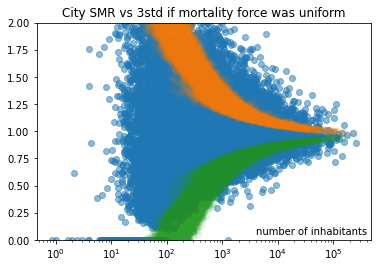

In [240]:
d = deaths_by_city[deaths_by_city['NB']>0].sort_values('Population')
q = d['ExpectedDeaths']/d['NB']
s = np.sqrt(np.multiply(q,(1-q))/(6*d['NB']) )/q #6 as we took the death average over 2014-2019 (6 years)
print(np.min(s))
print(np.max(s))
plt.scatter(d['NB'], d['SMR'],alpha=.5)
plt.scatter(d['NB'], .97+3*s,alpha=.05)
plt.scatter(d['NB'], .97-3*s,alpha=.05)
plt.ylim((0,2))
plt.title('City SMR vs 3std if mortality force was uniform')
plt.text(4000, 0.05, 'number of inhabitants')
plt.xscale('log')
plt.show()

0.004561903986775983
0.38919252607121446


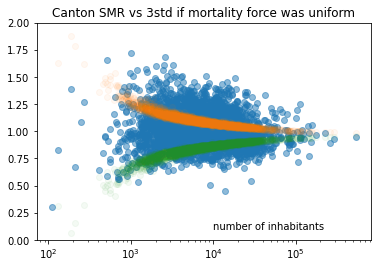

In [239]:
d = deaths_by_canton[deaths_by_canton['NB']>0].sort_values('Population')
q = d['ExpectedDeaths']/d['NB']
s = np.sqrt(np.multiply(q,(1-q))/(6*d['NB']) )/q #6 as we took the death average over 2014-2019 (6 years)
print(np.min(s))
print(np.max(s))
plt.scatter(d['NB'], d['SMR'],alpha=.5) #/d['Population']  /q
plt.scatter(d['NB'], .97+3*s,alpha=.05)
plt.scatter(d['NB'], .97-3*s,alpha=.05)
plt.ylim((0,2))
plt.title('Canton SMR vs 3std if mortality force was uniform')
plt.text(10000, 0.1, 'number of inhabitants')
plt.xscale('log')
plt.show()

In [149]:
# Following this page: http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/enedis_cartes.html
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

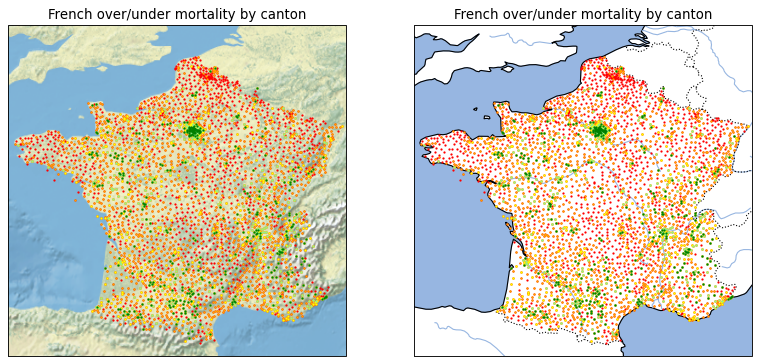

In [252]:
fig = plt.figure(figsize=(12, 6), dpi=80)
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
#the tif file was downloaded here https://www.naturalearthdata.com/downloads/50m-natural-earth-1/50m-natural-earth-i-with-shaded-relief-and-water/
#as suggested here https://gis.stackexchange.com/questions/313490/increasing-resolution-of-cartopy-stock-background
fname = os.path.join('../../../../../', 'NE1_50M_SR_W.tif')
ax.imshow(plt.imread(fname), origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
#ax.stock_img() #low resolution
ax.set_extent([-5, 8.3, 42, 52])
ax.set_aspect(1.3)
d = deaths_by_canton[deaths_by_canton['NB']>0]
ax.plot(d.longitude, d.latitude, '.', marker='o', color='red', markersize=1)
d1 = d[d['SMR']<1.10]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='orange', markersize=1)
d1 = d[d['SMR']<.95]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='yellow', markersize=1)
d1 = d[d['SMR']<.90]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='lightgreen', markersize=1)
d1 = d[d['SMR']<.85]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='green', markersize=1)
ax.set_title('French over/under mortality by canton')

ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax.set_extent([-5, 8.3, 42, 52])
ax.set_aspect(1.3)
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')
ax.plot(d.longitude, d.latitude, '.', marker='o', color='red', markersize=1)
d1 = d[d['SMR']<1.10]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='orange', markersize=1)
d1 = d[d['SMR']<.95]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='yellow', markersize=1)
d1 = d[d['SMR']<.90]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='lightgreen', markersize=1)
d1 = d[d['SMR']<.85]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='green', markersize=1)
ax.set_title('French over/under mortality by canton')

plt.show()

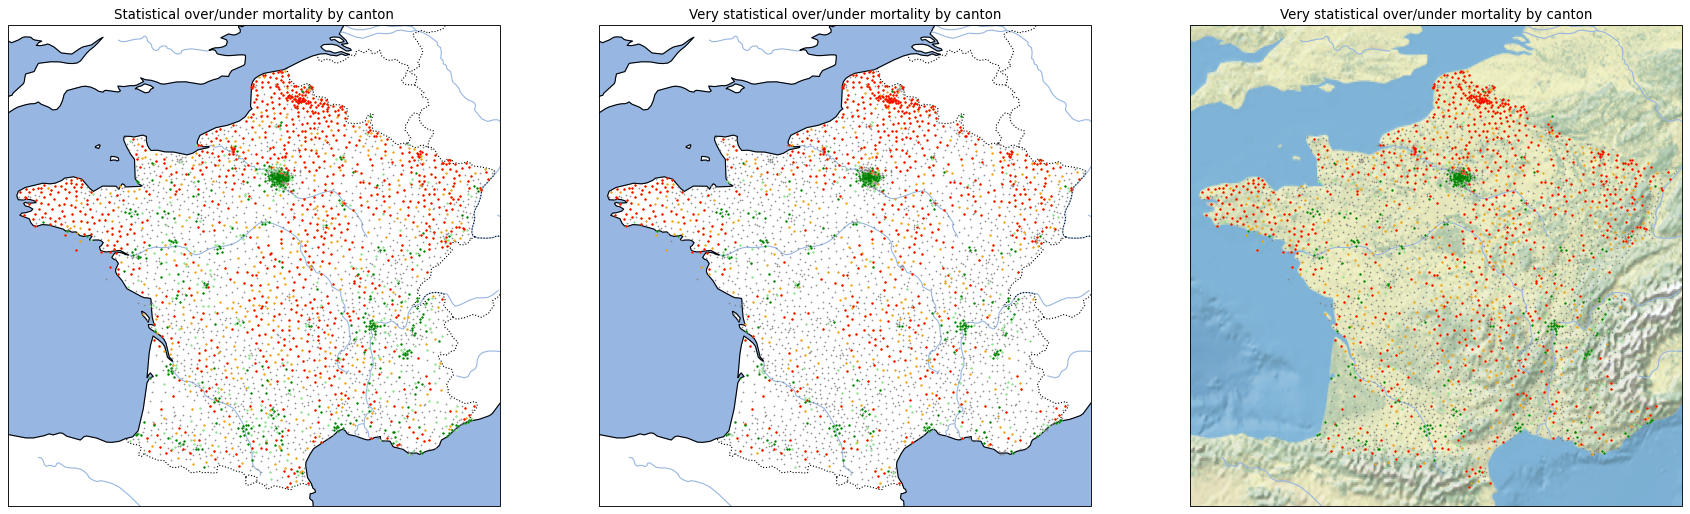

In [275]:
#colors based on statistics
d = deaths_by_canton[deaths_by_canton['NB']>0]
q = d['ExpectedDeaths']/d['NB']
s = np.sqrt(np.multiply(q,(1-q))/(6*d['NB']) )/q #6 as we took the death average over 2014-2019 (6 years)

fig = plt.figure(figsize=(27, 9), dpi=80)

ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 8.3, 42, 52])
ax.set_aspect(1.3)
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')
ax.plot(d.longitude, d.latitude, '.', marker='o', color='gray', markersize=0.5)
d1 = d[d['SMR']>.99+2*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='orange', markersize=1)
d1 = d[d['SMR']>.99+3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='red', markersize=1)
d1 = d[d['SMR']<.97-2*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='lightgreen', markersize=1)
d1 = d[d['SMR']<.97-3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='green', markersize=1)
ax.set_title('Statistical over/under mortality by canton')

ax = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax.set_extent([-5, 8.3, 42, 52])
ax.set_aspect(1.3)
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')
ax.plot(d.longitude, d.latitude, '.', marker='o', color='gray', markersize=0.5)
d1 = d[d['SMR']>.99+3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='orange', markersize=1)
d1 = d[d['SMR']>.99+4*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='red', markersize=1)
d1 = d[d['SMR']<.97-3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='lightgreen', markersize=1)
d1 = d[d['SMR']<.97-4*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='green', markersize=1)
ax.set_title('Very statistical over/under mortality by canton')

ax = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree())
fname = os.path.join('../../../../../', 'NE1_50M_SR_W.tif')
ax.imshow(plt.imread(fname), origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.set_extent([-5, 8.3, 42, 52])
ax.set_aspect(1.3)
ax.add_feature(cfeature.RIVERS.with_scale('50m'))

ax.plot(d.longitude, d.latitude, '.', marker='o', color='gray', markersize=0.5)
d1 = d[d['SMR']>.97+3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='orange', markersize=1)
d1 = d[d['SMR']>.97+4*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='red', markersize=1)
d1 = d[d['SMR']<.97-3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='lightgreen', markersize=1)
d1 = d[d['SMR']<.97-4*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='green', markersize=1)
ax.set_title('Very statistical over/under mortality by canton')

plt.show()

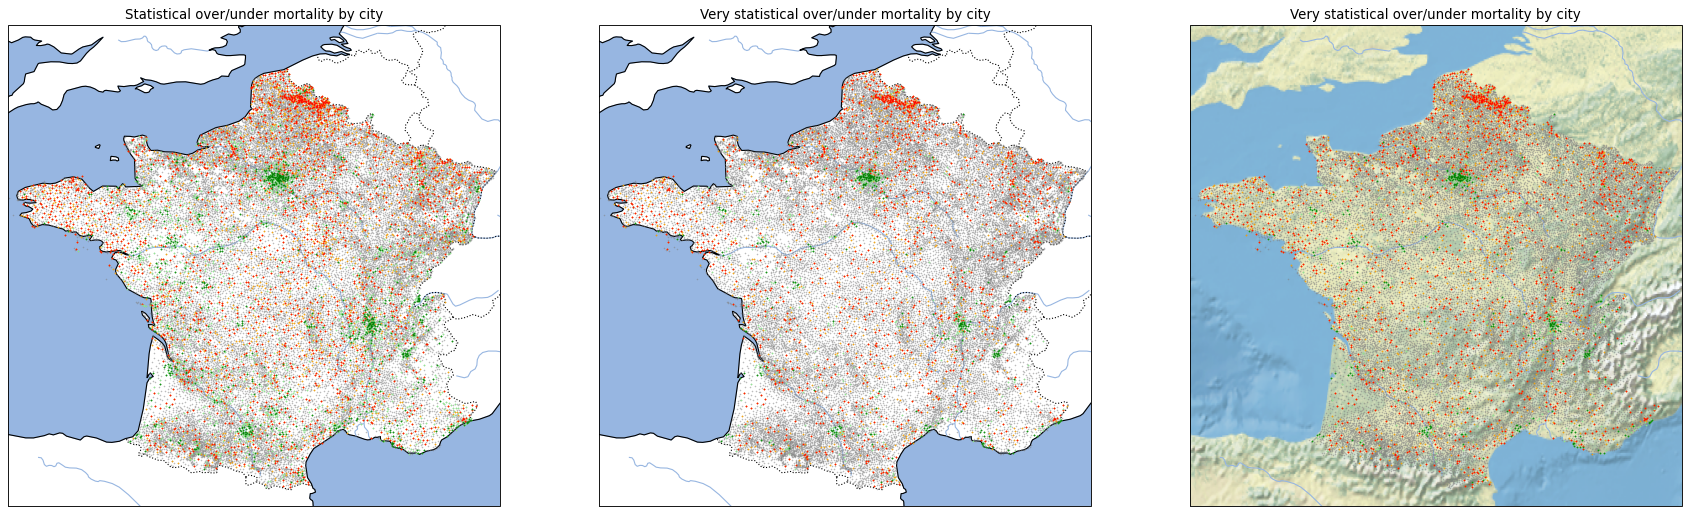

In [278]:
#colors based on statistics
d = deaths_by_city[deaths_by_city['NB']>0]
q = d['ExpectedDeaths']/d['NB']
s = np.sqrt(np.multiply(q,(1-q))/(6*d['NB']) )/q #6 as we took the death average over 2014-2019 (6 years)

fig = plt.figure(figsize=(27, 9), dpi=80)

ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 8.3, 42, 52])
ax.set_aspect(1.3)
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')
ax.plot(d.longitude, d.latitude, '.', marker='o', color='gray', markersize=0.25)
d1 = d[d['SMR']>.99+2*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='orange', markersize=0.5)
d1 = d[d['SMR']>.99+3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='red', markersize=0.5)
d1 = d[d['SMR']<.97-2*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='lightgreen', markersize=0.5)
d1 = d[d['SMR']<.97-3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='green', markersize=0.5)
ax.set_title('Statistical over/under mortality by city')

ax = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax.set_extent([-5, 8.3, 42, 52])
ax.set_aspect(1.3)
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')
ax.plot(d.longitude, d.latitude, '.', marker='o', color='gray', markersize=0.25)
d1 = d[d['SMR']>.99+3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='orange', markersize=0.5)
d1 = d[d['SMR']>.99+4*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='red', markersize=0.5)
d1 = d[d['SMR']<.97-3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='lightgreen', markersize=0.5)
d1 = d[d['SMR']<.97-4*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='green', markersize=0.5)
ax.set_title('Very statistical over/under mortality by city')

ax = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree())
fname = os.path.join('../../../../../', 'NE1_50M_SR_W.tif')
ax.imshow(plt.imread(fname), origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.set_extent([-5, 8.3, 42, 52])
ax.set_aspect(1.3)
ax.add_feature(cfeature.RIVERS.with_scale('50m'))

ax.plot(d.longitude, d.latitude, '.', marker='o', color='gray', markersize=0.25)
d1 = d[d['SMR']>.97+3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='orange', markersize=0.5)
d1 = d[d['SMR']>.97+4*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='red', markersize=0.5)
d1 = d[d['SMR']<.97-3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='lightgreen', markersize=0.5)
d1 = d[d['SMR']<.97-4*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='green', markersize=0.5)
ax.set_title('Very statistical over/under mortality by city')

plt.show()

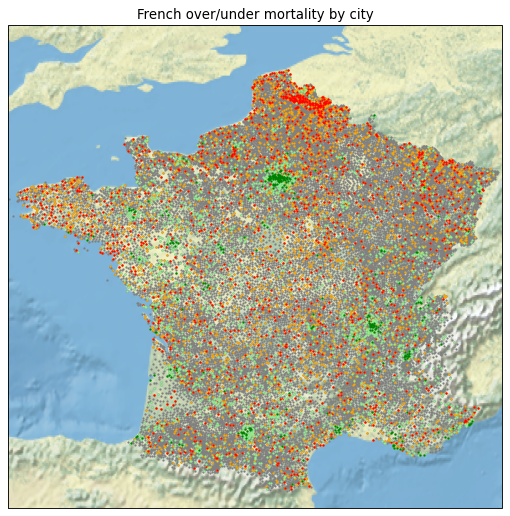

In [243]:
fig = plt.figure(figsize=(8, 8), dpi=80)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
fname = os.path.join('../../../../../', 'NE1_50M_SR_W.tif')
ax.imshow(plt.imread(fname), origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.set_extent([-5, 8.3, 42, 52])
ax.set_aspect(1.3)
d = deaths_by_city[deaths_by_city['NB']>0]
q = d['ExpectedDeaths']/d['NB']
s = np.sqrt(np.multiply(q,(1-q))/(6*d['NB']) )/q #6 as we took the death average over 2014-2019 (6 years)

ax.plot(d.longitude, d.latitude, '.', marker='o', color='gray', markersize=1)
d1 = d[d['SMR']>.97+2*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='orange', markersize=1)
d1 = d[d['SMR']>.97+4*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='red', markersize=1)
d1 = d[d['SMR']<.97-2*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='lightgreen', markersize=1)
d1 = d[d['SMR']<.97-4*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='green', markersize=1)
ax.set_title('French over/under mortality by city')
plt.show()

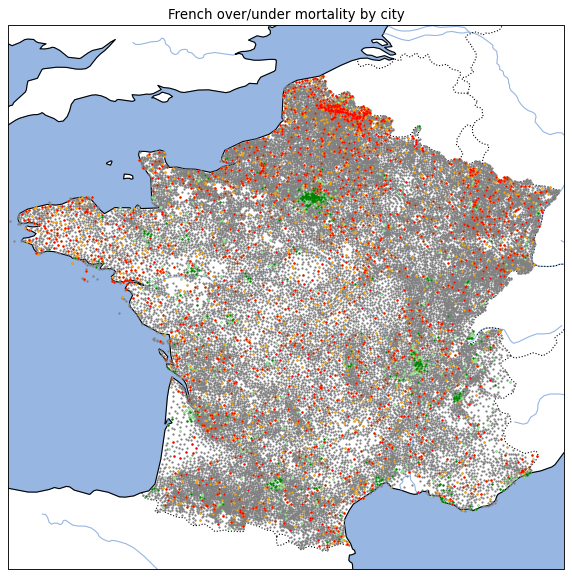

In [246]:
fig = plt.figure(figsize=(9, 9), dpi=80)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
fname = os.path.join('../../../../../', 'NE1_50M_SR_W.tif')
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')
ax.set_extent([-5, 8.3, 42, 52])
ax.set_aspect(1.3)
d = deaths_by_city[deaths_by_city['NB']>0]
q = d['ExpectedDeaths']/d['NB']
s = np.sqrt(np.multiply(q,(1-q))/(6*d['NB']) )/q #6 as we took the death average over 2014-2019 (6 years)

ax.plot(d.longitude, d.latitude, '.', marker='o', color='gray', markersize=1)
d1 = d[d['SMR']>.97+3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='orange', markersize=1)
d1 = d[d['SMR']>.97+4*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='red', markersize=1)
d1 = d[d['SMR']<.97-3*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='lightgreen', markersize=1)
d1 = d[d['SMR']<.97-4*s]
ax.plot(d1.longitude, d1.latitude, '.', marker='o', color='green', markersize=1)
ax.set_title('French over/under mortality by city')
plt.show()

In [176]:
deaths_by_canton[deaths_by_canton['NB']>0]

latitude  longitude             NB  \
Code Département Code Canton                                        
01               1            45.971430   5.349793   14925.804413   
                 2            46.332054   4.893758   11110.705024   
                 3            46.134177   5.773441   12978.647737   
                 4            45.735143   5.679326   13128.992924   
                 6            46.065504   5.580637    2556.989020   
...                                 ...        ...            ...   
97               95            3.260728 -22.376880   57913.104269   
                 96            3.253915 -22.297837   58683.154504   
                 97            3.321020 -22.410098   83161.282259   
                 98            3.196609 -22.331299   77747.412379   
                 99            3.683388 -29.930495  140730.649197   

                              ExpectedDeaths  ObservedDeaths  \
Code Département Code Canton                                   
01               1                180.205577      180.333333   
                 2                144.711925      149.166667   
                 3                157.509667      161.666667   
                 4                194.207859      197.333333   
                 6                 33.047614       32.500000   
...                                      ...             ...   
97               95               664.305003      593.833333   
                 96               658.757817      683.500000   
                 97               923.058073      863.666667   
                 98               830.709922      841.166667   
                 99              1634.268999     1710.000000   

                              Altitude Moyenne  Superficie  Population  \
Code Département Code Canton                                             
01               1                  316.250000     10491.0        22.1   
                 2                  184.777778      9671.0        14.7   
                 3                  801.600000     14412.0        15.6   
                 4                  333.809524     18821.0        17.1   
                 6                  831.777778     12657.0         3.4   
...                                        ...         ...         ...   
97               95                 361.000000     25443.0        86.8   
                 96                 261.000000     22822.0        96.8   
                 97                 318.333333     28783.0       139.3   
                 98                 202.333333     19795.0       121.9   
                 99                 419.250000     37891.0       238.3   

                                   SMR  
Code Département Code Canton            
01               1            1.000709  
                 2            1.030784  
                 3            1.026392  
                 4            1.016093  
                 6            0.983430  
...                                ...  
97               95           0.893917  
                 96           1.037559  
                 97           0.935658  
                 98           1.012588  
                 99           1.046339  

[3755 rows x 9 columns]

In [69]:
deaths_by_city.sort_values('SMR').iloc[0:34977].to_csv('SMRs_age,sex.csv', encoding='utf-8-sig')